In [1]:
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
import os
import tqdm

# load coordinate data

In [2]:
path_cor_train = '../../data/npy/labels_txt/train/'
path_cor_test = '../../data/npy/labels_txt/test/'

In [3]:
# load corrdinates of the image from the text file
files_name_cor_train = glob.glob(os.path.join(path_cor_train, "*.txt"))
files_name_cor_test = glob.glob(os.path.join(path_cor_test, "*.txt"))

In [4]:
# print len with good display
print('Number of training images: {}'.format(len(files_name_cor_train)))
print('Number of testing images: {}'.format(len(files_name_cor_test)))

Number of training images: 20
Number of testing images: 6


In [5]:
# read data in txt file
with open(files_name_cor_train[0], 'r') as f:
    data = f.read()
    print(data)

Cluster 2984.1311 1280.0615 100 100
Cluster 2836.9031 1142.0614 100 100
Unknown 2653.5243 1506.0657 100 100
Cluster 2565.6845 1030.0693 100 100
Unknown 2547.6279 1506.0703 100 100
Cluster 2271.3073 1982.09 100 100
Cluster 2268.6526 1188.0902 100 100
Cluster 1690.1643 1732.167 100 100
Cluster 1207.5897 3378.268 100 100
Cluster 861.35442 2602.3607 100 100



# Load npy files

In [6]:
# this processing on full image data
path_npy_train = '../../data/npy/full_img_flip/train/*'
path_npy_test = '../../data/npy/full_img_flip/test/*'

In [7]:
# get all folder name
folder_name_train = glob.glob(path_npy_train)
folder_name_test = glob.glob(path_npy_test)

In [8]:
folder_name_train

['../../data/npy/full_img_flip/train\\hst_10190_12_acs_wfc_f814w_j90o12_drc.npy',
 '../../data/npy/full_img_flip/train\\hst_10190_13_acs_wfc_f814w_j90o13_drc.npy',
 '../../data/npy/full_img_flip/train\\hst_10190_28_acs_wfc_f814w_j90o28_drc.npy',
 '../../data/npy/full_img_flip/train\\hst_14610_01_acs_wfc_f814w_jdb601_drc.npy',
 '../../data/npy/full_img_flip/train\\hst_14610_02_acs_wfc_f814w_jdb602_drc.npy',
 '../../data/npy/full_img_flip/train\\hst_14610_08_acs_wfc_f814w_jdb608_drc.npy',
 '../../data/npy/full_img_flip/train\\hst_14610_12_acs_wfc_f814w_jdb612_drc.npy',
 '../../data/npy/full_img_flip/train\\hst_14610_18_acs_wfc_f814w_jdb618_drc.npy',
 '../../data/npy/full_img_flip/train\\hst_14610_23_acs_wfc_f814w_jdb623_drc.npy',
 '../../data/npy/full_img_flip/train\\hst_14610_26_acs_wfc_f814w_jdb626_drc.npy',
 '../../data/npy/full_img_flip/train\\hst_14610_27_acs_wfc_f814w_jdb627_drc.npy',
 '../../data/npy/full_img_flip/train\\hst_14610_30_acs_wfc_f814w_jdb630_drc.npy',
 '../../data/npy

## Display box on image

In [9]:
def plot_bounding_box(items_list, img):
    # read data in items_list then save in a list
    with open(items_list, "r") as f:
        items_list = f.readlines()
        items_list = [item.strip().split(" ") for item in items_list]
    print(items_list)
    plt.rcParams['figure.figsize'] = [10, 10]
    for item in items_list:
        x = float(item[1])
        y = float(item[2])
        w = float(item[3])
        h = float(item[4])
        x_min = x - w
        x_max = x + w
        y_min = y - h
        y_max = y + h
        plt.plot([x_min, x_max], [y_min, y_min], c='r')
        plt.plot([x_min, x_max], [y_max, y_max], c='r')
        plt.plot([x_min, x_min], [y_min, y_max], c='r')
        plt.plot([x_max, x_max], [y_min, y_max], c='r')
    plt.imshow(img, cmap='gray')
    plt.show()

In [10]:
x = folder_name_train[0]
x

'../../data/npy/full_img_flip/train\\hst_10190_12_acs_wfc_f814w_j90o12_drc.npy'

In [11]:
files_name_cor_train[0]

'../../data/npy/labels_txt/train\\hst_10190_12_acs_wfc_f814w_j90o12_drc.txt'

[['Cluster', '2984.1311', '1280.0615', '100', '100'], ['Cluster', '2836.9031', '1142.0614', '100', '100'], ['Unknown', '2653.5243', '1506.0657', '100', '100'], ['Cluster', '2565.6845', '1030.0693', '100', '100'], ['Unknown', '2547.6279', '1506.0703', '100', '100'], ['Cluster', '2271.3073', '1982.09', '100', '100'], ['Cluster', '2268.6526', '1188.0902', '100', '100'], ['Cluster', '1690.1643', '1732.167', '100', '100'], ['Cluster', '1207.5897', '3378.268', '100', '100'], ['Cluster', '861.35442', '2602.3607', '100', '100']]


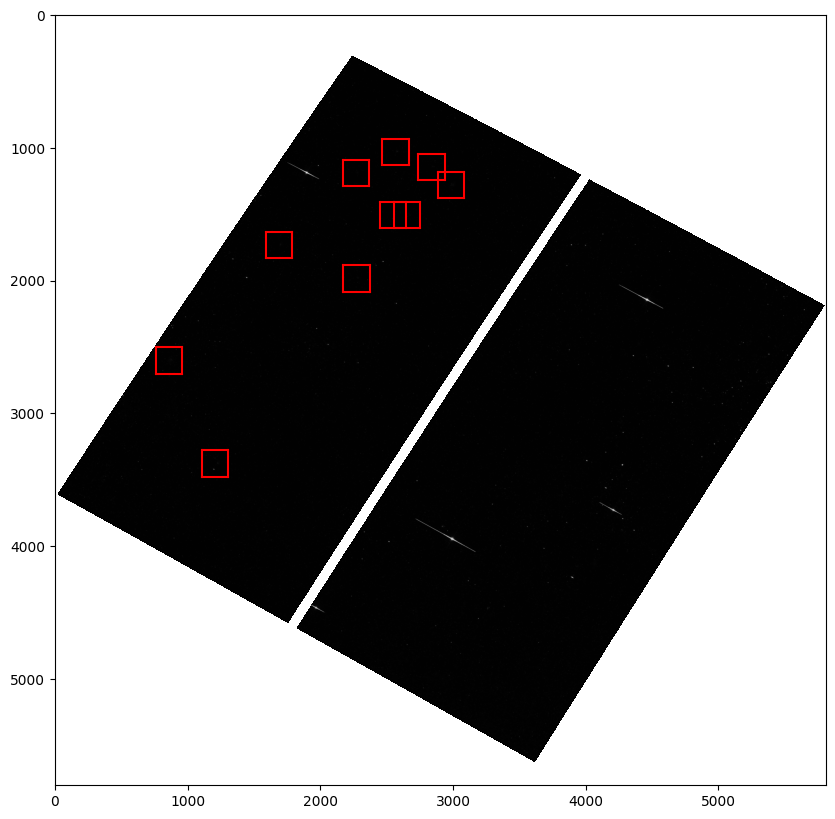

In [12]:
# plot bounding box
img = np.load(x)
plot_bounding_box(files_name_cor_train[0], img)

# Cropping process

In [13]:
def coordinate_index(items_list):
    with open(items_list, "r") as f:
        items_list = f.readlines()
        items_list = [item.strip().split(" ") for item in items_list]
    # print(items_list)
    # calculate x_min, x_max, y_min, y_max then return
    coor_list = []
    for item in items_list:
        label = item[0]
        x = float(item[1])
        y = float(item[2])
        w = float(item[3])
        h = float(item[4])
        x_min = x - w
        x_max = x + w
        y_min = y - h
        y_max = y + h
        coor_list.append([x_min, x_max, y_min, y_max, x, y, label, h, w])
    return coor_list

# create function to return small image after crop with size that intialized
def crop_image(img, new_h, new_w, coor_list): # use function per image
    # load coordinate of the image
    coor_list = coordinate_index(coor_list)
    new_coor = []

    img_h = img.shape[0]
    img_w = img.shape[1]
    cropped_list = []
    for j in range(0, img_h, new_h): # for y axis
        # calculate the end of the crop whole 4 corner
        start_y = j
        end_y = j + new_h
        if end_y > img_h: # if the end of the crop is out of the image
            end_y = img_h
            start_y = img_h - new_h
        for i in range(0, img_w, new_w): # for x axis
            start_x = i
            end_x = i + new_w
            if end_x > img_w: # if the end of the crop is out of the image
                end_x = img_w
                start_x = img_w - new_w

            # calculate the coordinate of the object in the crop
            temp_coor = [] # keep per small image
            for coor in coor_list: # check if coordinate of the crop is in the coordinate of the object
                if coor[0] >= start_x and coor[1] <= end_x and coor[2] >= start_y and coor[3] <= end_y:
                    # change coordinate of the object to the new coordinate follow new crop
                    new_x_min = coor[0] - start_x
                    new_x_max = coor[1] - start_x
                    new_y_min = coor[2] - start_y
                    new_y_max = coor[3] - start_y
                    new_x = coor[4] - start_x
                    new_y = coor[5] - start_y
                    label = coor[6]
                    h = coor[7]
                    w = coor[8]
                    # temp_coor.append([label, new_x_min, new_x_max, new_y_min, new_y_max, new_x, new_y])
                    
                    if label != 'Cluster':
                        pass
                    else:
                        temp_coor.append([label, new_x, new_y, h, w, new_x_min, new_x_max, new_y_min, new_y_max])

            new_coor.append(temp_coor)
            cropped_list.append(img[start_y:end_y, start_x:end_x])
    return cropped_list, new_coor

In [14]:
new_h = 1024
new_w = 1024

In [15]:
cropped_subimg_list, new_coordinate = crop_image(img, new_h, new_w, files_name_cor_train[0])

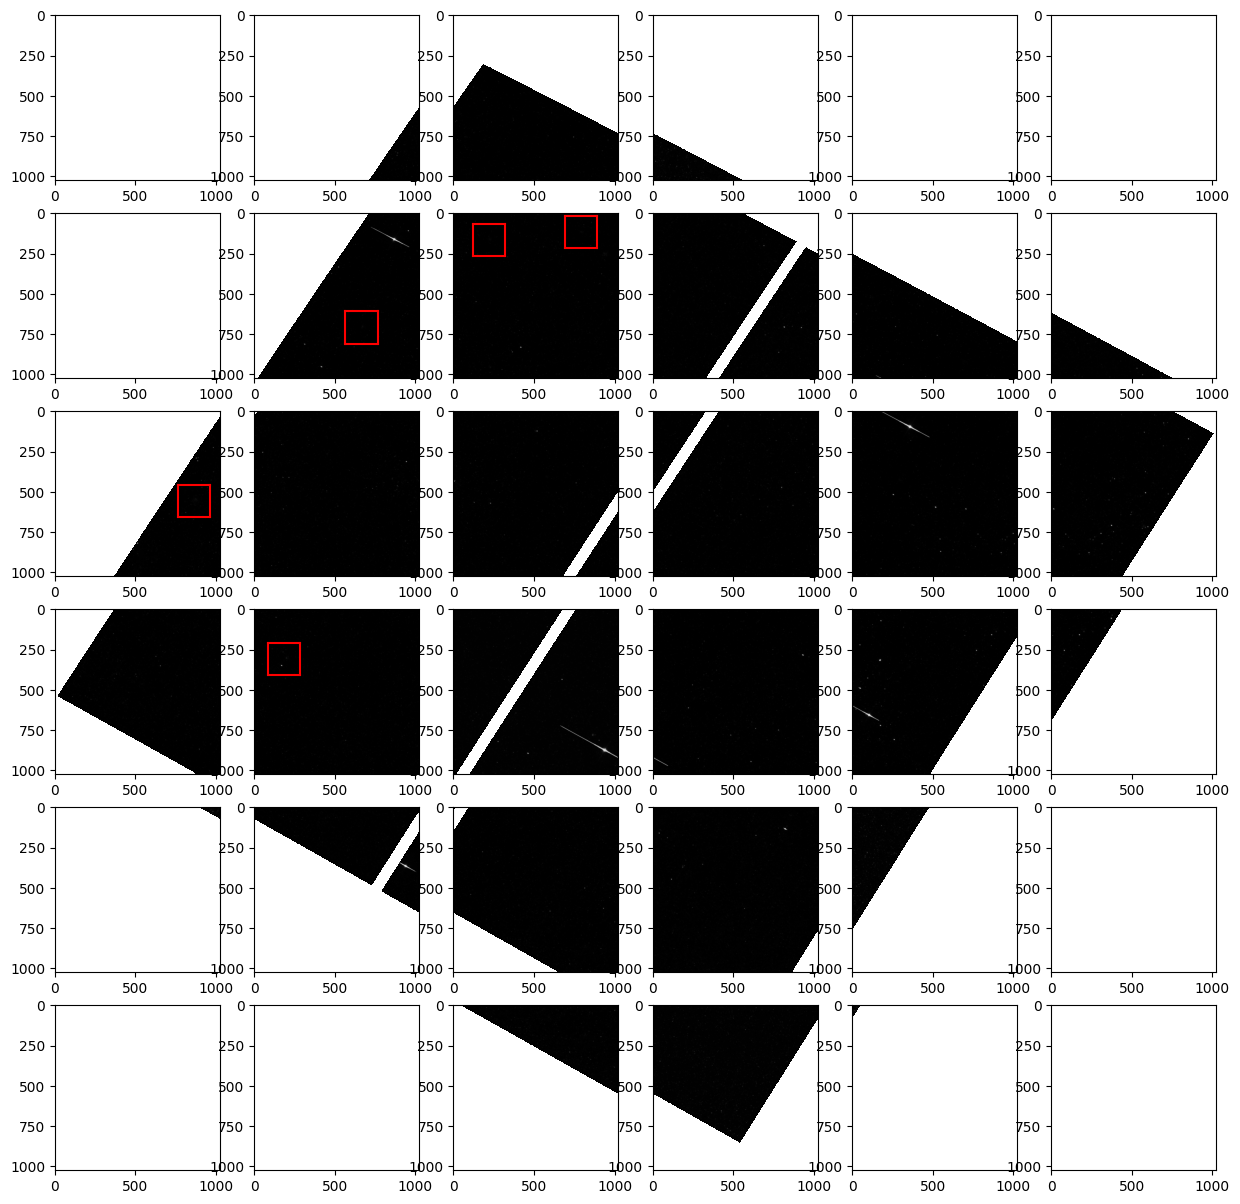

In [16]:
# plot all cropped image in cropped_list by row and column come from square root of length of cropped_list then plot scatter of coordinate of the object
plt.rcParams['figure.figsize'] = [15, 15]
# plot all cropped image in list by row and column come from square root of length of list
row = int(np.sqrt(len(cropped_subimg_list)))
column = int(np.sqrt(len(cropped_subimg_list)))
for i in range(len(cropped_subimg_list)):
    plt.subplot(row, column, i+1)
    plt.imshow(cropped_subimg_list[i], cmap="gray")
    for j in new_coordinate[i]:
        x = j[1]
        y = j[2]
        w = j[3]
        h = j[4]
        x_min = j[5]
        x_max = j[6]
        y_min = j[7]
        y_max = j[8]
        plt.plot([x_min, x_max], [y_min, y_min], c='r')
        plt.plot([x_min, x_max], [y_max, y_max], c='r')
        plt.plot([x_min, x_min], [y_min, y_max], c='r')
        plt.plot([x_max, x_max], [y_min, y_max], c='r')
plt.show()

In [17]:
# print stat img
print("mean: ", np.mean(img))
print("std: ", np.std(img))
print("max: ", np.max(img))
print("min: ", np.min(img))

mean:  nan
std:  nan
max:  nan
min:  nan


# Exporting

In [18]:
def convert(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + box[1])/2.0
    y = (box[2] + box[3])/2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    # return x,y,w,h with float 4 digits
    return (round(x, 4), round(y, 4), round(w, 4), round(h, 4))

# convert the positon from pixel to YOLO format following the format file: labels x_center y_center width height
# calculate x_min = x-w, x_max = x+w, y_min = y-h, y_max = y+h
def convert_position_to_YOLO_format(items_list, img, path, name_to_write):
    """
    items_list: list of items in position file
    img: image
    """
    try:
        height, width, _ = img.shape
    except:
        height, width = img.shape
    if items_list != []:
        for item in items_list:
            x = float(item[1])
            y = float(item[2])
            w = float(item[3])
            h = float(item[4])
            x_min = (x - w) 
            x_max = (x + w) 
            y_min = (y - h) 
            y_max = (y + h) 
            new_pos = convert((width, height), (x_min, x_max, y_min, y_max))
            # open file to write in Yolo_labels_global_F814W_InvertY by file_
            with open(path + name_to_write, "a") as f:
                if item[0] == "Cluster":
                    # print("0", new_pos[0], new_pos[1], new_pos[2], new_pos[3])
                    f.write("0" + " " + str(new_pos[0]) + " " + str(new_pos[1]) + " " + str(new_pos[2]) + " " + str(new_pos[3]) + "\n")
                else:
                    # print("1", new_pos[0], new_pos[1], new_pos[2], new_pos[3])
                    # f.write("1" + " " + str(new_pos[0]) + " " + str(new_pos[1]) + " " + str(new_pos[2]) + " " + str(new_pos[3]) + "\n")
                    
                    # don't write anything if the item is not a cluster
                    pass
            f.close()
    else:
        with open(path + name_to_write, "a") as f:
            f.write("")
        f.close()

In [22]:
def export_sub_img(arr_img, arr_label, target_path_img, target_path_label, new_h=1024, new_w=1024):
    for i in tqdm.tqdm(range(len(arr_img))):
        i_img_name = arr_img[i].split("\\")[-1].split(".")[0]
        i_cor_name = arr_label[i].split("\\")[-1].split(".")[0]
        if i_img_name == i_cor_name:
            img = np.load(arr_img[i])
            cropped_img_list, new_coordinate = crop_image(img, new_h, new_w, arr_label[i])
            for k in range(len(cropped_img_list)): # loop through each cropped image
                if new_coordinate[k] == []:
                    pass
                else:
                    # save cropped image in to new folder with file name is the same as the original image
                    np.save(target_path_img + arr_img[i].split("\\")[-1].split(".")[0] + '_' + str(k+1) + '.npy', cropped_img_list[k])
                    # save coordinate of the object in the cropped image to new folder with file name is the same as the original image
                    convert_position_to_YOLO_format(new_coordinate[k], cropped_img_list[k], 
                    target_path_label, i_cor_name + '_' + str(k+1) + '.txt')
        else:
            print('error, file name is not match')
            break

In [23]:
# get all subfolder in the folder
train = glob.glob(os.path.join(path_npy_train))
test = glob.glob(os.path.join(path_npy_test))
coor_train = glob.glob(os.path.join(path_cor_train))
coor_test = glob.glob(os.path.join(path_cor_test))
# print details

print('folder in training data : ', (train))
print('folder in testing data : ', (test))
print('folder in training coordinate : ', (coor_train))
print('folder in testing coordinate : ', (coor_test))

folder in training data :  ['../../data/npy/full_img_flip/train\\hst_10190_12_acs_wfc_f814w_j90o12_drc.npy', '../../data/npy/full_img_flip/train\\hst_10190_13_acs_wfc_f814w_j90o13_drc.npy', '../../data/npy/full_img_flip/train\\hst_10190_28_acs_wfc_f814w_j90o28_drc.npy', '../../data/npy/full_img_flip/train\\hst_14610_01_acs_wfc_f814w_jdb601_drc.npy', '../../data/npy/full_img_flip/train\\hst_14610_02_acs_wfc_f814w_jdb602_drc.npy', '../../data/npy/full_img_flip/train\\hst_14610_08_acs_wfc_f814w_jdb608_drc.npy', '../../data/npy/full_img_flip/train\\hst_14610_12_acs_wfc_f814w_jdb612_drc.npy', '../../data/npy/full_img_flip/train\\hst_14610_18_acs_wfc_f814w_jdb618_drc.npy', '../../data/npy/full_img_flip/train\\hst_14610_23_acs_wfc_f814w_jdb623_drc.npy', '../../data/npy/full_img_flip/train\\hst_14610_26_acs_wfc_f814w_jdb626_drc.npy', '../../data/npy/full_img_flip/train\\hst_14610_27_acs_wfc_f814w_jdb627_drc.npy', '../../data/npy/full_img_flip/train\\hst_14610_30_acs_wfc_f814w_jdb630_drc.npy', 

## Training set

In [24]:
save_path_train_img = '../../data/npy/sub_img/train/'
save_path_train_label = '../../data/npy/sub_label_txt/train/'

In [25]:
arr_img = train
arr_txt = glob.glob(os.path.join(coor_train[0], "*.txt"))
print(' length of iterate_image : ', len(arr_img))
print(' length of iterate_coordinate : ', len(arr_txt))

 length of iterate_image :  20
 length of iterate_coordinate :  20


In [27]:
export_sub_img(arr_img, arr_txt, save_path_train_img, save_path_train_label)

100%|██████████| 20/20 [00:08<00:00,  2.49it/s]


## Validation set

In [28]:
save_path_test_img = '../../data/npy/sub_img/test/'
save_path_test_label = '../../data/npy/sub_label_txt/test/'

In [29]:
arr_img = test
arr_txt = glob.glob(os.path.join(coor_test[0], "*.txt"))
print(' length of iterate_image : ', len(arr_img))
print(' length of iterate_coordinate : ', len(arr_txt))

 length of iterate_image :  6
 length of iterate_coordinate :  6


In [30]:
export_sub_img(arr_img, arr_txt, save_path_test_img, save_path_test_label)

100%|██████████| 6/6 [00:02<00:00,  2.30it/s]
